In [2]:
import pandas as pd
from plotnine import *
import random
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from math import *
import seaborn as sns

In [128]:
data=pd.read_csv('./worldcities.csv')

In [129]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [130]:
random.seed(5)
list_c=["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])for j in range(20)]

In [55]:
k=3

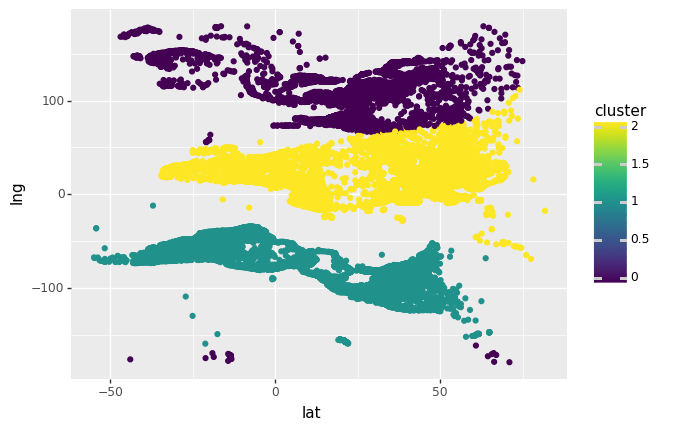

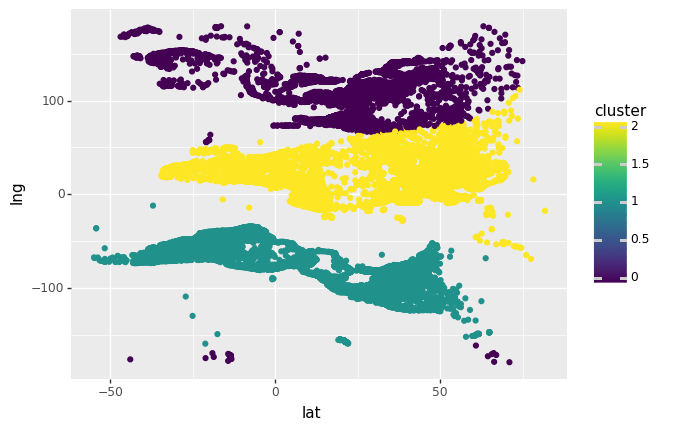

In [56]:
# def normalize(series):
#     return (series - series.mean())/series.std()

# data['lat']=normalize(data['lat'])
# data['lng']=normalize(data['lng'])

pts=[np.array(pt) for pt in zip(data['lat'],data['lng'])]

centers = random.sample(pts,k)

old_cluster_ids, cluster_ids = None, []
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids=[]
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(lon1=pt[1],lat1=pt[0],lon2=center[1],lat2=center[0])
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    data['cluster']=cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts,cluster_ids) if cluster ==match]for match in range(k)]
    centers=[sum(pts)/len(pts) for pts in cluster_pts]
(ggplot(data,aes(x='lat',y='lng',color='cluster'))+geom_point()).draw()


In [57]:
# !pip uninstall shapely -y
# !pip install shapely --no-binary shapely

In [58]:
pts_list_3=[]
for cluster in range(k):
    cluster_pt=[np.array(pt) for pt in zip(data[data['cluster']==cluster]['lat'],data[data['cluster']==cluster]['lng'])]
    pts_list_3.append(cluster_pt)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


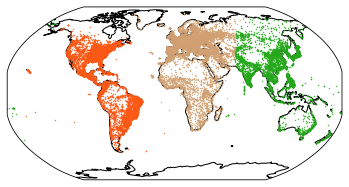

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Robinson())
lats= [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(k):
  lats=[pt[0] for pt in pts_list_3[j]]
  lngs=[pt[1] for pt in pts_list_3[j]]
  ax.plot(lngs,lats, ".", markersize=0.8,color=list_c[j], transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

In [131]:
k=5

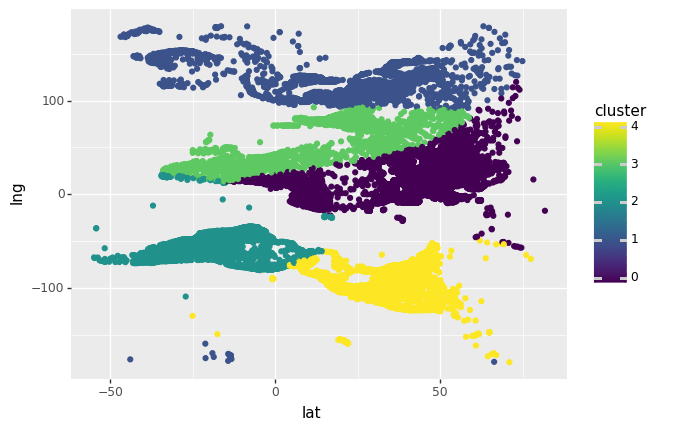

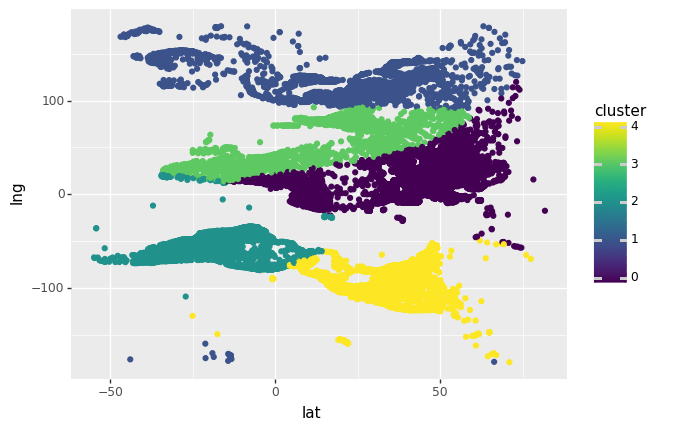

In [132]:
# def normalize(series):
#     return (series - series.mean())/series.std()

# data['lat']=normalize(data['lat'])
# data['lng']=normalize(data['lng'])

pts=[np.array(pt) for pt in zip(data['lat'],data['lng'])]

centers = random.sample(pts,k)

old_cluster_ids, cluster_ids = None, []
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids=[]
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(lon1=pt[1],lat1=pt[0],lon2=center[1],lat2=center[0])
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    data['cluster']=cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts,cluster_ids) if cluster ==match]for match in range(k)]
    centers=[sum(pts)/len(pts) for pts in cluster_pts]
(ggplot(data,aes(x='lat',y='lng',color='cluster'))+geom_point()).draw()


In [133]:
pts_list_5=[]
for cluster in range(k):
    cluster_pt=[np.array(pt) for pt in zip(data[data['cluster']==cluster]['lat'],data[data['cluster']==cluster]['lng'])]
    pts_list_5.append(cluster_pt)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


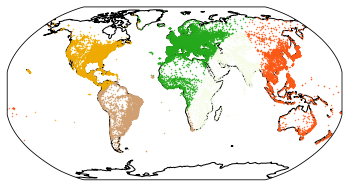

In [134]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Robinson())
lats= [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(k):
  lats=[pt[0] for pt in pts_list_5[j]]
  lngs=[pt[1] for pt in pts_list_5[j]]
  ax.plot(lngs,lats, ".", color=list_c[j], markersize=0.8,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

In [108]:
k=7

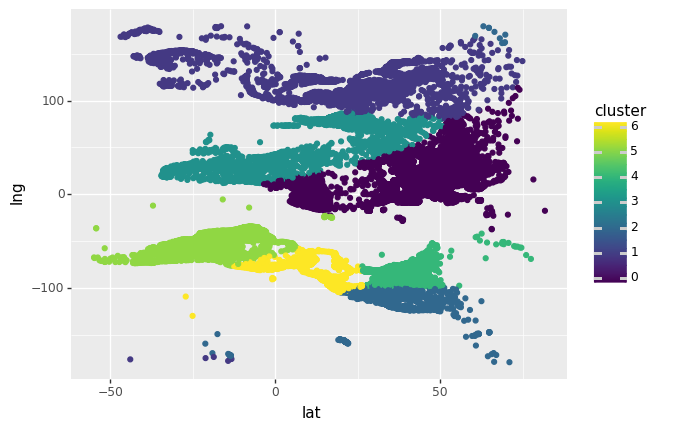

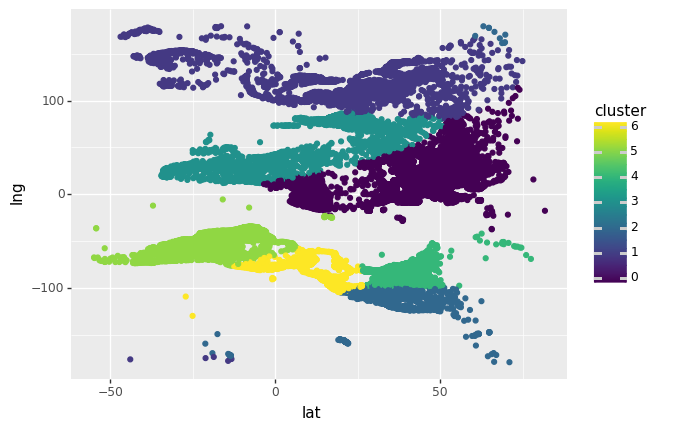

In [109]:
# def normalize(series):
#     return (series - series.mean())/series.std()

# data['lat']=normalize(data['lat'])
# data['lng']=normalize(data['lng'])

pts=[np.array(pt) for pt in zip(data['lat'],data['lng'])]

centers = random.sample(pts,k)

old_cluster_ids, cluster_ids = None, []
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids=[]
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(lon1=pt[1],lat1=pt[0],lon2=center[1],lat2=center[0])
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    data['cluster']=cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts,cluster_ids) if cluster ==match]for match in range(k)]
    centers=[sum(pts)/len(pts) for pts in cluster_pts]
(ggplot(data,aes(x='lat',y='lng',color='cluster'))+geom_point()).draw()


In [110]:
pts_list_7=[]
for cluster in range(k):
    cluster_pt=[np.array(pt) for pt in zip(data[data['cluster']==cluster]['lat'],data[data['cluster']==cluster]['lng'])]
    pts_list_7.append(cluster_pt)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


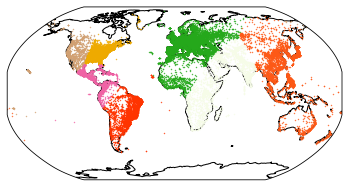

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Robinson())
lats= [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(k):
  lats=[pt[0] for pt in pts_list_7[j]]
  lngs=[pt[1] for pt in pts_list_7[j]]
  ax.plot(lngs,lats, ".", color=list_c[j], markersize=0.8, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

In [104]:
k=15

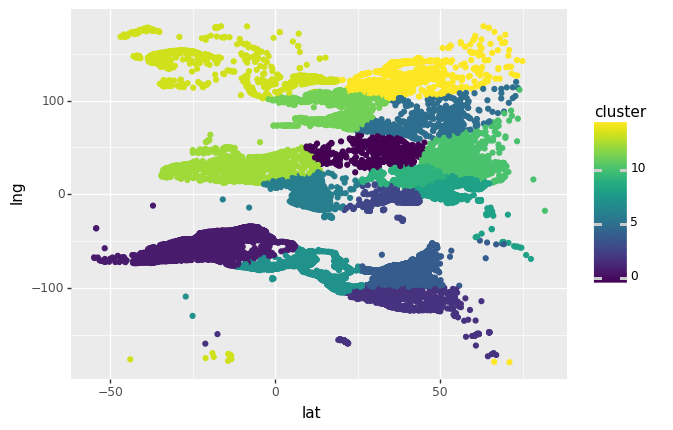

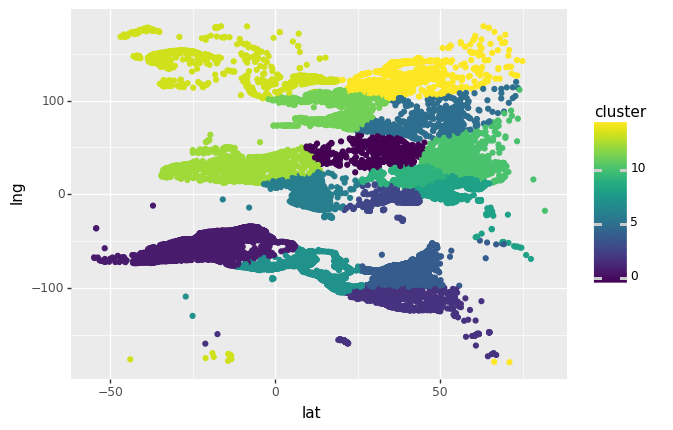

In [105]:
# def normalize(series):
#     return (series - series.mean())/series.std()

# data['lat']=normalize(data['lat'])
# data['lng']=normalize(data['lng'])

pts=[np.array(pt) for pt in zip(data['lat'],data['lng'])]

centers = random.sample(pts,k)

old_cluster_ids, cluster_ids = None, []
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids=[]
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(lon1=pt[1],lat1=pt[0],lon2=center[1],lat2=center[0])
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    data['cluster']=cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts,cluster_ids) if cluster ==match]for match in range(k)]
    centers=[sum(pts)/len(pts) for pts in cluster_pts]
(ggplot(data,aes(x='lat',y='lng',color='cluster'))+geom_point()).draw()


In [106]:
pts_list_15=[]
for cluster in range(k):
    cluster_pt=[np.array(pt) for pt in zip(data[data['cluster']==cluster]['lat'],data[data['cluster']==cluster]['lng'])]
    pts_list_15.append(cluster_pt)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


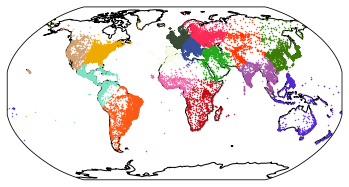

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Robinson())
lats= [pt[0] for pt in pts]
lngs = [pt[1] for pt in pts]
ax.coastlines()
for j in range(k):
  lats=[pt[0] for pt in pts_list_15[j]]
  lngs=[pt[1] for pt in pts_list_15[j]]
  ax.plot(lngs,lats, ".", color=list_c[j], markersize=0.8,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()